# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 7 ##
### Mattia Nasi 11590A ###

## <span style=color:red> 07.2 ##


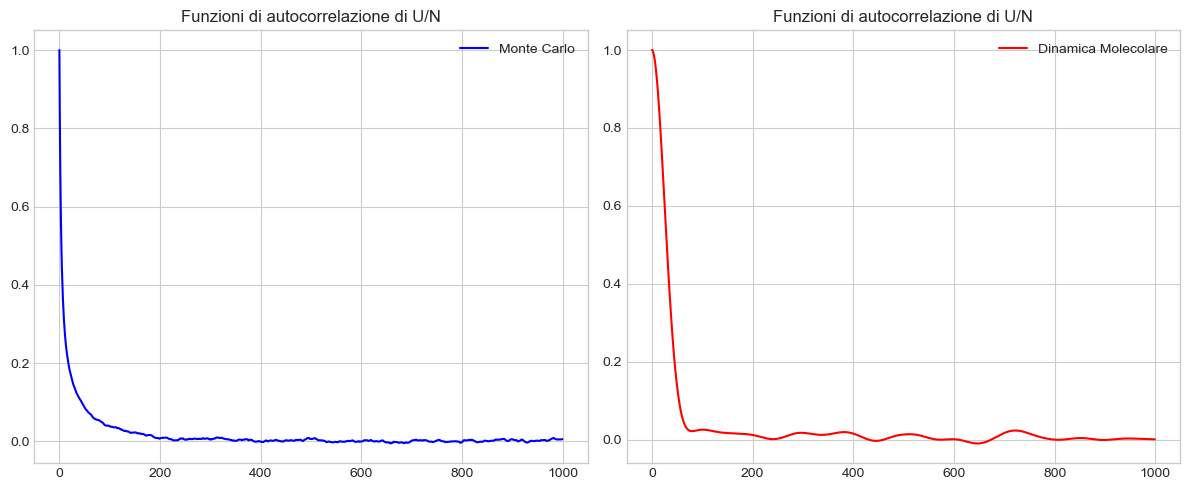

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

t_max = 500000

t, U_MC = np.loadtxt("NSL_SIMULATOR/MC 7.2/potential_energy.dat", usecols=(0,1), unpack=True)
U_MD = np.loadtxt("NSL_SIMULATOR/MD 7.2/potential_energy.dat", usecols = 1)

autocorrelation_MC = []  
autocorrelation_MD = []
t_calcolati = []

for i in range(0,1000):
    a_MC = 0.0
    a_MD = 0.0
    b_MC = 0.0
    b_MD = 0.0
    c_MC = 0.0
    c_MD = 0.0
    d_MC = 0.0
    d_MD = 0.0
    e_MC = 0.0
    e_MD = 0.0
    for j in range( t_max - i ):
        a_MC += U_MC[j] * U_MC[j+i]
        a_MD += U_MD[j] * U_MD[j+i]
        b_MC += U_MC[j]
        b_MD += U_MD[j]
        c_MC += U_MC[j+i]
        c_MD += U_MD[j+i]
    for k in range ( t_max):
        d_MC += U_MC[k] * U_MC[k]
        d_MD += U_MD[k] * U_MD[k]
        e_MC += U_MC[k]
        e_MD += U_MD[k]
    autocorrelation_MC.append(( (1. / (t_max - i) * a_MC ) - 1./(t_max - i) * b_MC * 1./(t_max - i) * c_MC ) / ( (1./ t_max) * d_MC - ( (1./ t_max) * e_MC )**2 ))
    autocorrelation_MD.append(( (1. / (t_max - i) * a_MD ) - 1./(t_max - i) * b_MD * 1./(t_max - i) * c_MD ) / ( (1./ t_max) * d_MD - ( (1./ t_max) * e_MD )**2 ))
    t_calcolati.append(i)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

axes[0].plot(t_calcolati, autocorrelation_MC,  color='b', label='Monte Carlo')
axes[0].set_title("Funzioni di autocorrelazione di U/N")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(t_calcolati, autocorrelation_MD,  color='r', label='Dinamica Molecolare')
axes[1].set_title("Funzioni di autocorrelazione di U/N")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

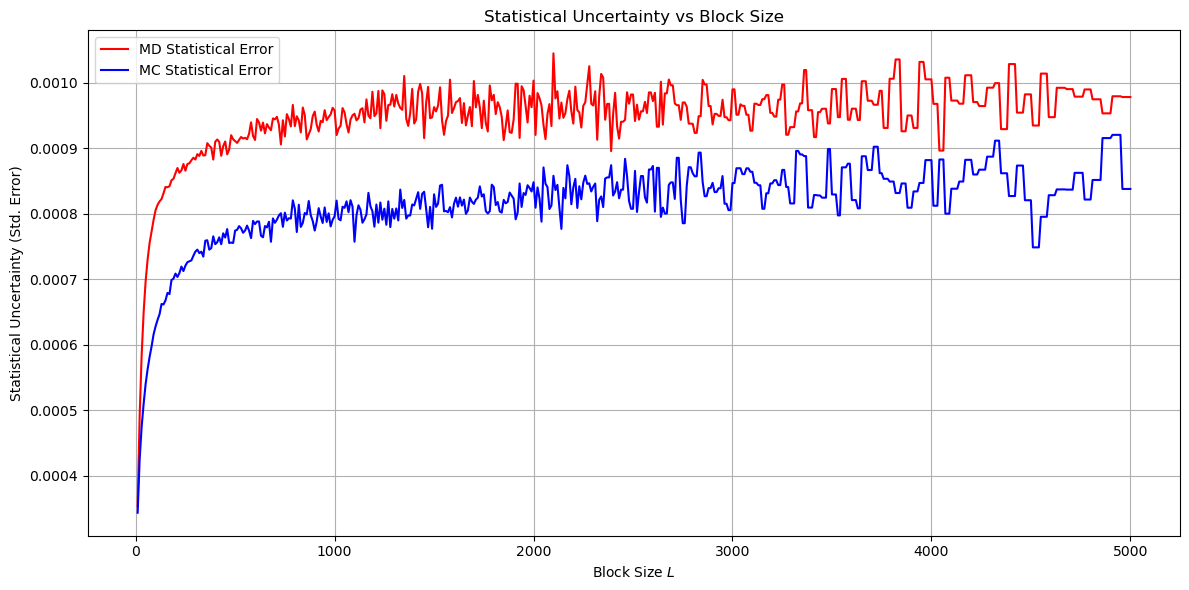

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def block_average(data, n_blocks):
    N = len(data)
    if N % n_blocks != 0:
        data = data[:N - (N % n_blocks)]  # Trim so divisible by n_blocks
    block_size = len(data) // n_blocks
    blocks = data.reshape((n_blocks, block_size))
    means = blocks.mean(axis=1)
    mean_of_means = means.mean()
    std_error = np.sqrt(np.var(means, ddof=1) / n_blocks)
    return mean_of_means, std_error

T, enMD, _, errMD = np.loadtxt("NSL_SIMULATOR/MD 7.2/potential_energy.dat", usecols=(0, 1, 2, 3), unpack=True)
enMC, errMC = np.loadtxt("NSL_SIMULATOR/MC 7.2/potential_energy.dat", usecols=(1, 3), unpack=True)

# Define block sizes L
min_L = 10
max_L = 5000
step_L = 10
block_sizes = np.arange(min_L, max_L + 1, step_L)

errors_md = []
errors_mc = []
valid_block_sizes_md = []
valid_block_sizes_mc = []

M_md = len(enMD)
M_mc = len(enMC)

# For MD
for L in block_sizes:
    if M_md // L < 2:
        continue  # Need at least 2 blocks to compute variance
    n_blocks = M_md // L
    _, err = block_average(enMD, n_blocks)
    errors_md.append(err)
    valid_block_sizes_md.append(L)

# For MC
for L in block_sizes:
    if M_mc // L < 2:
        continue
    n_blocks = M_mc // L
    _, err = block_average(enMC, n_blocks)
    errors_mc.append(err)
    valid_block_sizes_mc.append(L)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(valid_block_sizes_md, errors_md, label='MD Statistical Error', color='red', markersize=3)
plt.plot(valid_block_sizes_mc, errors_mc, label='MC Statistical Error', color='blue', markersize=3)
plt.xlabel("Block Size $L$")
plt.ylabel("Statistical Uncertainty (Std. Error)")
plt.title("Statistical Uncertainty vs Block Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


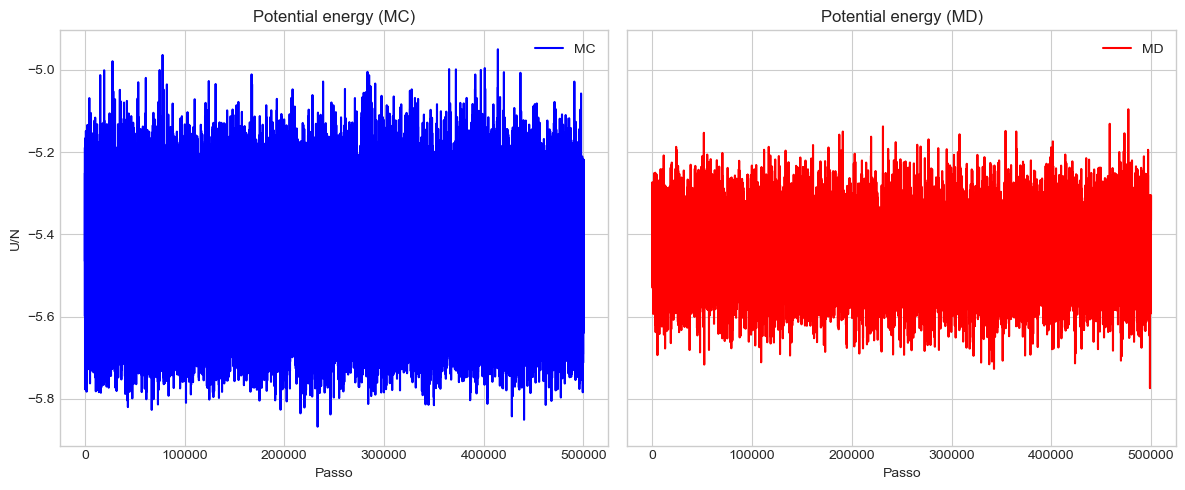

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Monte Carlo
axes[0].plot(t, U_MC, color='blue', label='MC')
axes[0].set_title("Potential energy (MC)")
axes[0].set_xlabel("Passo")
axes[0].set_ylabel("U/N")
axes[0].grid(True)
axes[0].legend()

# Dinamica Molecolare
axes[1].plot(t, U_MD, color='red', label='MD')
axes[1].set_title("Potential energy (MD)")
axes[1].set_xlabel("Passo")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

## <span style=color:red> 07.4 ##

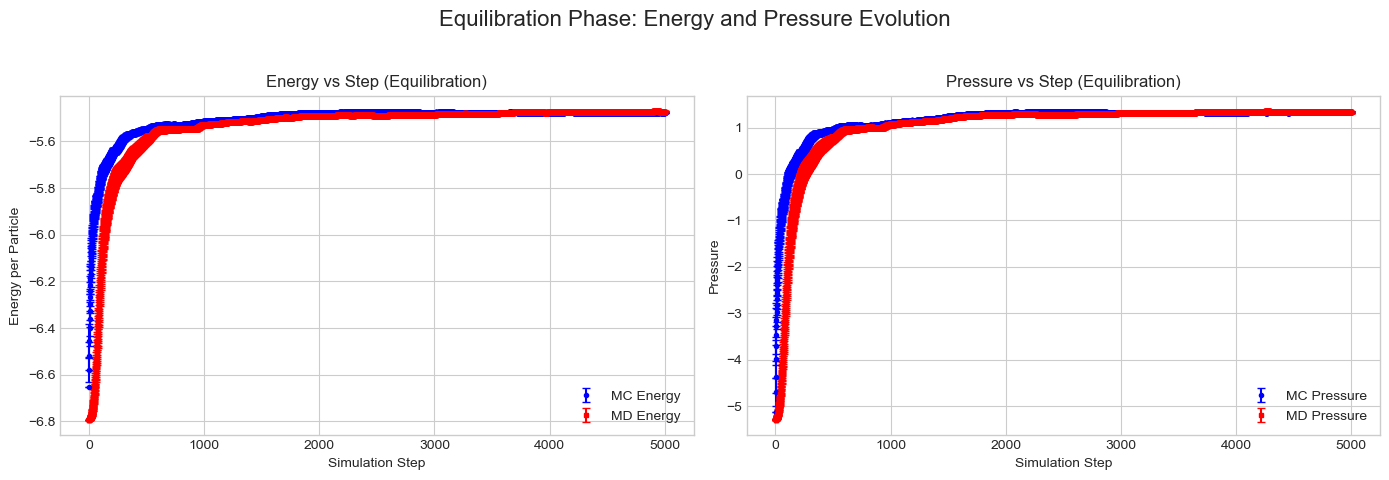

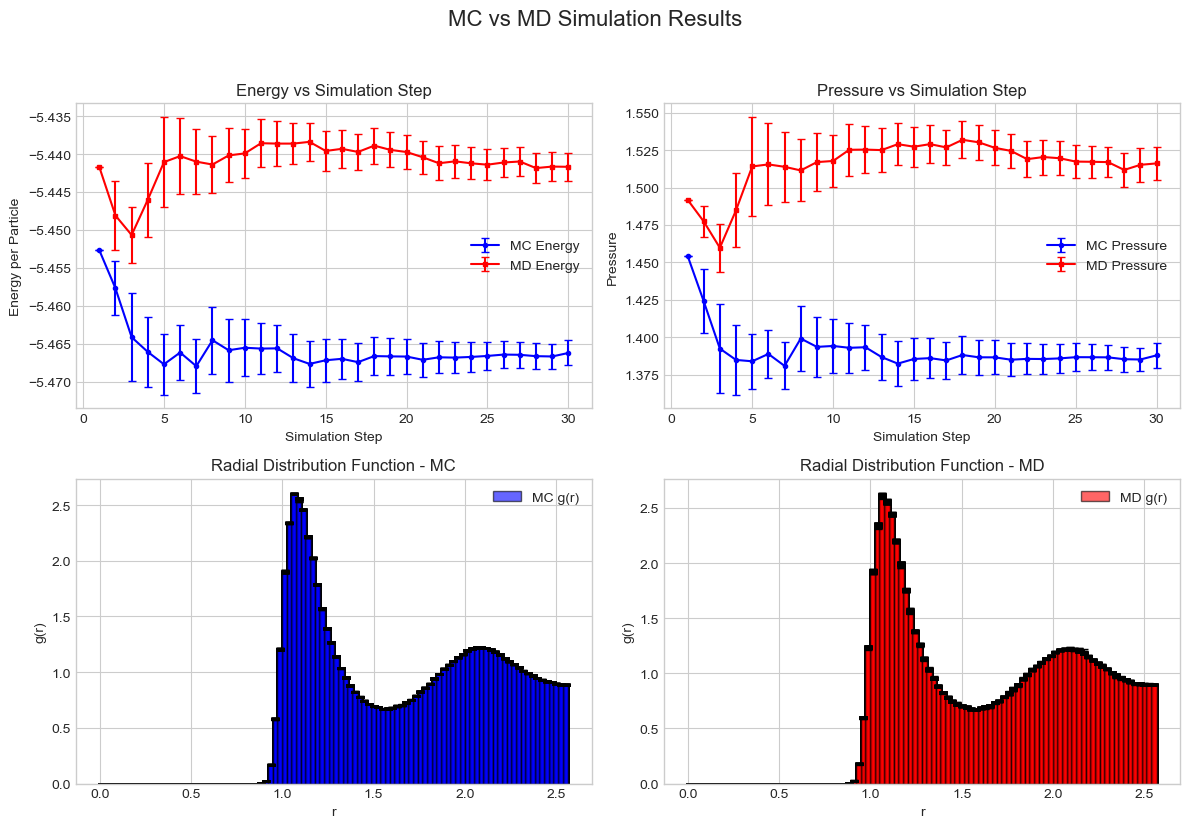

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Use improved style
plt.style.use('seaborn-v0_8-whitegrid')

# Define some nicer colors
colors = plt.get_cmap('tab10').colors
set2 = plt.get_cmap('Set2').colors

N_MC, _, energyMC, errorenergyMC = np.loadtxt("NSL_SIMULATOR/OUT_MC_7.4/potential_energy.dat", usecols=(0, 1, 2, 3), unpack=True)
_, _, pressureMC, errorpressureMC = np.loadtxt("NSL_SIMULATOR/OUT_MC_7.4/pressure.dat", usecols=(0, 1, 2, 3), unpack=True)
binsMC, _, gofrMC, errorgofrMC = np.loadtxt("NSL_SIMULATOR/OUT_MC_7.4/gofr.dat", usecols=(0, 1, 2, 3), unpack=True)

N_MD, _, energyMD, errorenergyMD = np.loadtxt("NSL_SIMULATOR/OUT_MD_7.4/potential_energy.dat", usecols=(0, 1, 2, 3), unpack=True)
_, _, pressureMD, errorpressureMD = np.loadtxt("NSL_SIMULATOR/OUT_MD_7.4/pressure.dat", usecols=(0, 1, 2, 3), unpack=True)
binsMD, _, gofrMD, errorgofrMD = np.loadtxt("NSL_SIMULATOR/OUT_MD_7.4/gofr.dat", usecols=(0, 1, 2, 3), unpack=True)

N_MC_eq, _, energyMC_eq, errorenergyMC_eq = np.loadtxt("NSL_SIMULATOR/OUT_EQ_MC_7.4/potential_energy.dat", usecols=(0, 1, 2, 3), unpack=True)
_, _, pressureMC_eq, errorpressureMC_eq = np.loadtxt("NSL_SIMULATOR/OUT_EQ_MC_7.4/pressure.dat", usecols=(0, 1, 2, 3), unpack=True)
N_MD_eq, _, energyMD_eq, errorenergyMD_eq = np.loadtxt("NSL_SIMULATOR/OUT_EQ_MD_7.4/potential_energy.dat", usecols=(0, 1, 2, 3), unpack=True)
_, _, pressureMD_eq, errorpressureMD_eq = np.loadtxt("NSL_SIMULATOR/OUT_EQ_MD_7.4/pressure.dat", usecols=(0, 1, 2, 3), unpack=True)

fig_eq, axs_eq = plt.subplots(1, 2, figsize=(14, 5))
fig_eq.suptitle("Equilibration Phase: Energy and Pressure Evolution", fontsize=16)

# --- Energy vs Step (Equilibration) ---
axs_eq[0].errorbar(N_MC_eq, energyMC_eq, yerr=errorenergyMC_eq, label='MC Energy', fmt='o', markersize=3, color='blue', capsize=3)
axs_eq[0].errorbar(N_MD_eq, energyMD_eq, yerr=errorenergyMD_eq, label='MD Energy', fmt='s', markersize=3, color='red', capsize=3)
axs_eq[0].set_xlabel("Simulation Step")
axs_eq[0].set_ylabel("Energy per Particle")
axs_eq[0].set_title("Energy vs Step (Equilibration)")
axs_eq[0].legend()
axs_eq[0].grid(True)

# --- Pressure vs Step (Equilibration) ---
axs_eq[1].errorbar(N_MC_eq, pressureMC_eq, yerr=errorpressureMC_eq, label='MC Pressure', fmt='o', markersize=3, color='blue', capsize=3)
axs_eq[1].errorbar(N_MD_eq, pressureMD_eq, yerr=errorpressureMD_eq, label='MD Pressure', fmt='s', markersize=3, color='red', capsize=3)
axs_eq[1].set_xlabel("Simulation Step")
axs_eq[1].set_ylabel("Pressure")
axs_eq[1].set_title("Pressure vs Step (Equilibration)")
axs_eq[1].legend()
axs_eq[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("MC vs MD Simulation Results", fontsize=16, y=1.03)

# --- Energy vs Step ---
axs[0, 0].errorbar(N_MC, energyMC, yerr=errorenergyMC, label='MC Energy', fmt='o-', markersize=3, color='blue', capsize=3)
axs[0, 0].errorbar(N_MD, energyMD, yerr=errorenergyMD, label='MD Energy', fmt='s-', markersize=3, color='red', capsize=3)
axs[0, 0].set_xlabel("Simulation Step")
axs[0, 0].set_ylabel("Energy per Particle")
axs[0, 0].set_title("Energy vs Simulation Step")
axs[0, 0].legend()
axs[0, 0].grid(True)

# --- Pressure vs Step ---
axs[0, 1].errorbar(N_MC, pressureMC, yerr=errorpressureMC, label='MC Pressure', fmt='o-', markersize=3, color='blue', capsize=3)
axs[0, 1].errorbar(N_MD, pressureMD, yerr=errorpressureMD, label='MD Pressure', fmt='s-', markersize=3, color='red', capsize=3)
axs[0, 1].set_xlabel("Simulation Step")
axs[0, 1].set_ylabel("Pressure")
axs[0, 1].set_title("Pressure vs Simulation Step")
axs[0, 1].legend()
axs[0, 1].grid(True)

# --- g(r) MC ---
axs[1, 0].bar(binsMC, gofrMC, width=0.03, align='center', alpha=0.6, color='blue', edgecolor='black', label='MC g(r)')
axs[1, 0].errorbar(binsMC, gofrMC, yerr=errorgofrMC, fmt='none', ecolor='black', capsize=3)
axs[1, 0].set_xlabel("r")
axs[1, 0].set_ylabel("g(r)")
axs[1, 0].set_title("Radial Distribution Function - MC")
axs[1, 0].legend()
axs[1, 0].grid(True)

# --- g(r) MD ---
axs[1, 1].bar(binsMD, gofrMD, width=0.03, align='center', alpha=0.6, color='red', edgecolor='black', label='MD g(r)')
axs[1, 1].errorbar(binsMD, gofrMD, yerr=errorgofrMD, fmt='none', ecolor='black', capsize=3)
axs[1, 1].set_xlabel("r")
axs[1, 1].set_ylabel("g(r)")
axs[1, 1].set_title("Radial Distribution Function - MD")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()
